# Handling missing values - Feature Engineering

#### What are different types of missing data ?

##### 1. Missing Completely at Random, MCAR:
A variable is missing completely at random (MCAR) if the probability of being missing is the same  for all observations.
When data is MCAR there is absolutely no relationship between the data missing and any other values, observed or missing, within
the dataset. In other words, those missing data points are random subset of the data.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df[df['Embarked'].isnull()]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN

##### 2. Missing Data Not At Random (MNAR): Systemetic missing values
There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [6]:
df['cabin_null'] = np.where(df['Cabin'].isnull(), 1, 0)

# Percentage of null values
df['cabin_null'].mean()

0.7710437710437711

In [7]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  cabin_null  
0      0         A/5 21171   7.2500   NaN        S           1  
1      0          PC 17599  71.2833   C85        C           0  
2      0  STON/O2. 3101282   7.9250   NaN        S           1  
3      0            113803  53.1000  C123        S           0  
4      0            373450   8.0500   NaN        S           1

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [9]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

In [10]:
# almost 60.23% have null values who survived
# almost 87.61% have null values who not survived

##### 3. Missing At Random (MNAR):

# All techniques to handle missing values

1) Mean / Median / Mode replacement
2) Random Sample Imputation
3) Capturing NAN values with a new feature
4) End of Distribution Imputation
5) Arbitrary Imputation
6) Frequent categories imputation

#### 1. Mean / Median / Mode imputation

When should we apply ?
-> Mean / Median imputation has the assumption that the data are missing completely at random(MCAR)
 We solve this by replacing NAN value with the most frequent occurence of the variable.

In [11]:
df = pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [12]:
# lets see the % of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [13]:
def impute_nan(df, variable, median):
    df[variable + "_median"] = df[variable].fillna(median) 

In [14]:
median = df.Age.median()
median

28.0

In [15]:
impute_nan(df, "Age", median)

In [16]:
df

Survived   Age     Fare  Age_median
0           0  22.0   7.2500        22.0
1           1  38.0  71.2833        38.0
2           1  26.0   7.9250        26.0
3           1  35.0  53.1000        35.0
4           0  35.0   8.0500        35.0
..        ...   ...      ...         ...
886         0  27.0  13.0000        27.0
887         1  19.0  30.0000        19.0
888         0   NaN  23.4500        28.0
889         1  26.0  30.0000        26.0
890         0  32.0   7.7500        32.0

[891 rows x 4 columns]

In [17]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334042
13.019696550973201


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

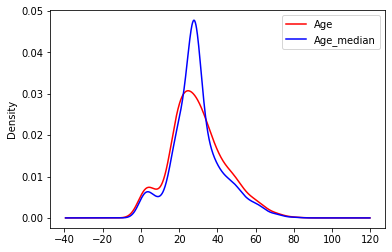

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax = ax, color = 'red')
df.Age_median.plot(kind = 'kde', ax = ax, color = 'blue')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### Advantages
- Easy to implement.
- Faster way to obtain complete dataset.

#### Disadvantages
- Change or distortion in the original variance

#

#### 2. Random Sample Imputation

`Aim`: Random Sample Imputation consists of taking random observation from the dataset and we use this observation to replace NAN values

`When it should be used?`: It assumes that the data are missing completely at random (MCAR)

In [20]:
df = pd.read_csv("titanic.csv", usecols=['Age', 'Fare', 'Survived'])

In [21]:
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [22]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [23]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [24]:
def impute_nan(df, variable, median):
    df[variable + "_median"] = df[variable].fillna(median) 
    df[variable+ "_random"] = df[variable]
    # It will have the random sample to fill the nan
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    # pandas needs to have the same index to merge the dataset
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable + "_random"] = random_sample

In [25]:
median =  df.Age.median()

In [26]:
median

28.0

In [27]:
impute_nan(df, "Age", median)

In [28]:
df.head()

Survived   Age     Fare  Age_median  Age_random
0         0  22.0   7.2500        22.0        22.0
1         1  38.0  71.2833        38.0        38.0
2         1  26.0   7.9250        26.0        26.0
3         1  35.0  53.1000        35.0        35.0
4         0  35.0   8.0500        35.0        35.0

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

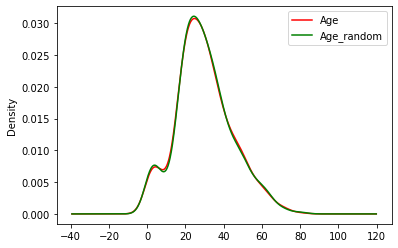

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
df.Age.plot(kind='kde', ax = ax, color = 'red')
df.Age_random.plot(kind = 'kde', ax = ax, color = 'green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### Advantages
- Easy to implement.
- There is no distortion in variance

#### Disadvantages
- Every situation randomness won't work

#### 3. Capturing NAN values with a new feature

It works well if the data are not missing completely at random

In [31]:
df = pd.read_csv("titanic.csv", usecols=["Age", "Fare", "Survived"])
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [32]:
df["Age_NAN"] = np.where(df['Age'].isnull(),1,0)

In [33]:
df.Age.median()

28.0

In [34]:
df["Age"].fillna(df.Age.median(), inplace=True)

In [35]:
df.head(50)

Survived   Age      Fare  Age_NAN
0          0  22.0    7.2500        0
1          1  38.0   71.2833        0
2          1  26.0    7.9250        0
3          1  35.0   53.1000        0
4          0  35.0    8.0500        0
5          0  28.0    8.4583        1
6          0  54.0   51.8625        0
7          0   2.0   21.0750        0
8          1  27.0   11.1333        0
9          1  14.0   30.0708        0
10         1   4.0   16.7000        0
11         1  58.0   26.5500        0
12         0  20.0    8.0500        0
13         0  39.0   31.2750        0
14         0  14.0    7.8542        0
15         1  55.0   16.0000        0
16         0   2.0   29.1250        0
17         1  28.0   13.0000        1
18         0  31.0   18.0000        0
19         1  28.0    7.2250        1
20         0  35.0   26.0000        0
21         1  34.0   13.0000        0
22         1  15.0    8.0292        0
23         1  28.0   35.5000        0
24         0   8.0   21.0750        0
25         1  38.0   31.3875        0
26         0  28.0    7.2250        1
27         0  19.0  263.0000        0
28         1  28.0    7.8792        1
29         0  28.0    7.8958        1
30         0  40.0   27.7208        0
31         1  28.0  146.5208        1
32         1  28.0    7.7500        1
33         0  66.0   10.5000        0
34         0  28.0   82.1708        0
35         0  42.0   52.0000        0
36         1  28.0    7.2292        1
37         0  21.0    8.0500        0
38         0  18.0   18.0000        0
39         1  14.0   11.2417        0
40         0  40.0    9.4750        0
41         0  27.0   21.0000        0
42         0  28.0    7.8958        1
43         1   3.0   41.5792        0
44         1  19.0    7.8792        0
45         0  28.0    8.0500        1
46         0  28.0   15.5000        1
47         1  28.0    7.7500        1
48         0  28.0   21.6792        1
49         0  18.0   17.8000        0

#### Advantages
- Easy to implement.
- Captures the importance of missing values

#### Disadvantages
- Creating additional features leads to curse of dimentionality

#### 4. End of Distribution imputation

In [36]:
df = pd.read_csv("titanic.csv", usecols=['Age', 'Fare', 'Survived'])
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

<AxesSubplot:>

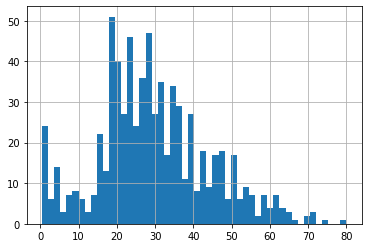

In [37]:
df.Age.hist(bins=50)

In [38]:
extreme = df.Age.mean() + 3 * df.Age.std()  # end of distribution: meo + 3 sigma

/home/surajkarki/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

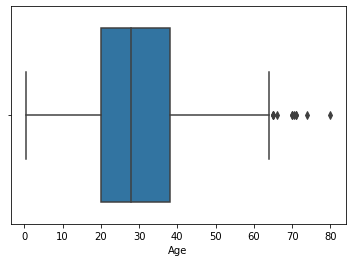

In [39]:
import seaborn as sns
sns.boxplot("Age", data=df)

# Here dots at the right side are outliers

In [40]:
def impute_nan(df, variable, median, extreme):
    df[variable+"_end_distribution"] = df[variable].fillna(extreme)
    df[variable].fillna(median, inplace=True)
    

In [41]:
impute_nan(df, "Age", df.Age.median(), extreme)

In [42]:
df.head()

Survived   Age     Fare  Age_end_distribution
0         0  22.0   7.2500                  22.0
1         1  38.0  71.2833                  38.0
2         1  26.0   7.9250                  26.0
3         1  35.0  53.1000                  35.0
4         0  35.0   8.0500                  35.0

<AxesSubplot:>

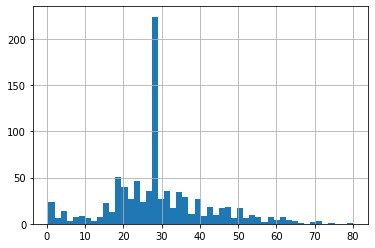

In [43]:
df.Age.hist(bins=50)

<AxesSubplot:>

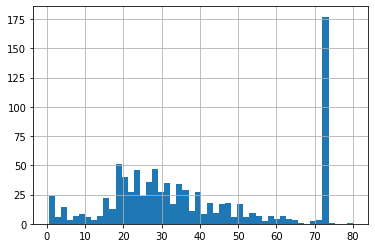

In [44]:
df.Age_end_distribution.hist(bins=50)

sns.boxplot("Age_end_distribution", data=df)
# as you can see all the outliers are gone

#

#### 5. Arbitrary value imputation
It consists of replacing NAN by an arbitrary value. This technique is derived from kaggle competition.

In [45]:
df = pd.read_csv("titanic.csv", usecols=["Age", "Fare", "Survived"])
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [46]:
def impute_nan(df, variable):
    df[variable + "_zero"] = df[variable].fillna(0)
    df[variable + "_hundred"] = df[variable].fillna(100)

##### Properties of arbitrary value
- It should not be more frequently present 

In [47]:
impute_nan(df, "Age")

In [48]:
df.head(10)

Survived   Age     Fare  Age_zero  Age_hundred
0         0  22.0   7.2500      22.0         22.0
1         1  38.0  71.2833      38.0         38.0
2         1  26.0   7.9250      26.0         26.0
3         1  35.0  53.1000      35.0         35.0
4         0  35.0   8.0500      35.0         35.0
5         0   NaN   8.4583       0.0        100.0
6         0  54.0  51.8625      54.0         54.0
7         0   2.0  21.0750       2.0          2.0
8         1  27.0  11.1333      27.0         27.0
9         1  14.0  30.0708      14.0         14.0

#### Advantages
- Easy to implement.
- Captures the importance of missingness if there is one

#### Disadvantages
- Distorts the original distribution of the variable
- if missingness is not that important, it may mask the predictive power of the original  variable by distorting its distribution.
- Hard to decide which value to use

#

## How to handle categorical missing values ?

#### 1) Frequent Category Imputation
It is used when there are less nan values in categorical variable

In [49]:
df = pd.read_csv("house_price_prediction.csv", usecols=["BsmtQual", "FireplaceQu", "GarageType", "SalePrice"])

In [50]:
df.head()

BsmtQual FireplaceQu GarageType  SalePrice
0       Gd         NaN     Attchd     208500
1       Gd          TA     Attchd     181500
2       Gd          TA     Attchd     223500
3       TA          Gd     Detchd     140000
4       Gd          TA     Attchd     250000

In [51]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

### Compute the frequency with every feature

In [52]:
df["BsmtQual"].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<AxesSubplot:>

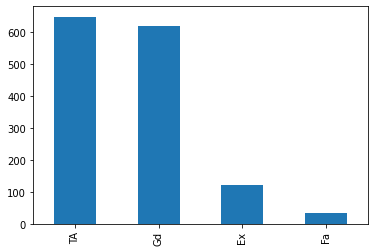

In [53]:
df["BsmtQual"].value_counts().plot.bar()

In [54]:
df["GarageType"].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

<AxesSubplot:>

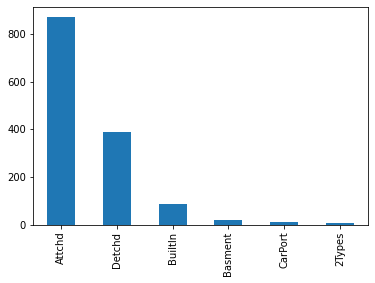

In [55]:
df["GarageType"].value_counts().plot.bar()

In [56]:
df["FireplaceQu"].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

<AxesSubplot:>

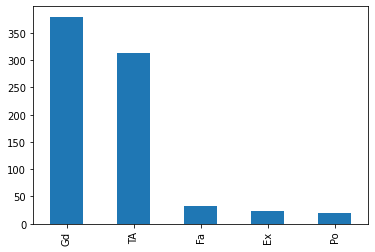

In [57]:
df["FireplaceQu"].value_counts().plot.bar()

#

In [58]:
def impute_nan(df, variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category, inplace=True)

In [59]:
for feature in  ["BsmtQual", "FireplaceQu", "GarageType"]:
    impute_nan(df, feature)

In [60]:
df.head()

BsmtQual FireplaceQu GarageType  SalePrice
0       Gd          Gd     Attchd     208500
1       Gd          TA     Attchd     181500
2       Gd          TA     Attchd     223500
3       TA          Gd     Detchd     140000
4       Gd          TA     Attchd     250000

In [61]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

#### Advantages
- Easy to implement.
- Faster way to implement.

#### Disadvantages
- Since we are using the more frequent lables, it may use them in an over represented way, if there are many nans.
- It distorts the relationship of most frequent label

#

#### 2) Adding a variable to capture nan


In [62]:
df = pd.read_csv("house_price_prediction.csv", usecols=["BsmtQual", "FireplaceQu", "GarageType", "SalePrice"])
df.head()

BsmtQual FireplaceQu GarageType  SalePrice
0       Gd         NaN     Attchd     208500
1       Gd          TA     Attchd     181500
2       Gd          TA     Attchd     223500
3       TA          Gd     Detchd     140000
4       Gd          TA     Attchd     250000

In [63]:
df["BsmtQual_Var"] = np.where(df["BsmtQual"].isnull(), 1, 0)

In [64]:
df.head()

BsmtQual FireplaceQu GarageType  SalePrice  BsmtQual_Var
0       Gd         NaN     Attchd     208500             0
1       Gd          TA     Attchd     181500             0
2       Gd          TA     Attchd     223500             0
3       TA          Gd     Detchd     140000             0
4       Gd          TA     Attchd     250000             0

In [70]:
 frequent = df["BsmtQual"].value_counts().index[0]

In [72]:
df["BsmtQual"].fillna(frequent, inplace=True)

In [75]:
df.head(20)

BsmtQual FireplaceQu GarageType  SalePrice  BsmtQual_Var
0        Gd         NaN     Attchd     208500             0
1        Gd          TA     Attchd     181500             0
2        Gd          TA     Attchd     223500             0
3        TA          Gd     Detchd     140000             0
4        Gd          TA     Attchd     250000             0
5        Gd         NaN     Attchd     143000             0
6        Ex          Gd     Attchd     307000             0
7        Gd          TA     Attchd     200000             0
8        TA          TA     Detchd     129900             0
9        TA          TA     Attchd     118000             0
10       TA         NaN     Detchd     129500             0
11       Ex          Gd    BuiltIn     345000             0
12       TA         NaN     Detchd     144000             0
13       Gd          Gd     Attchd     279500             0
14       TA          Fa     Attchd     157000             0
15       TA         NaN     Detchd     132000             0
16       TA          TA     Attchd     149000             0
17       TA         NaN    CarPort      90000             1
18       TA         NaN     Detchd     159000             0
19       TA         NaN     Attchd     139000             0

In [76]:
df["FireplaceQu_Var"] = np.where(df["FireplaceQu"].isnull(), 1, 0)

In [78]:
frequent = df["FireplaceQu"].value_counts().index[0]
print(frequent)

Gd


In [80]:
df["FireplaceQu"].fillna(frequent, inplace=True)
df.head(10)

BsmtQual FireplaceQu GarageType  SalePrice  BsmtQual_Var  FireplaceQu_Var
0       Gd          Gd     Attchd     208500             0                1
1       Gd          TA     Attchd     181500             0                0
2       Gd          TA     Attchd     223500             0                0
3       TA          Gd     Detchd     140000             0                0
4       Gd          TA     Attchd     250000             0                0
5       Gd          Gd     Attchd     143000             0                1
6       Ex          Gd     Attchd     307000             0                0
7       Gd          TA     Attchd     200000             0                0
8       TA          TA     Detchd     129900             0                0
9       TA          TA     Attchd     118000             0                0

### Suppose you have more frequent catrgories, we just replace nan with a new category

In [81]:
df = pd.read_csv("house_price_prediction.csv", usecols=["BsmtQual", "FireplaceQu", "GarageType", "SalePrice"])
df.head()

BsmtQual FireplaceQu GarageType  SalePrice
0       Gd         NaN     Attchd     208500
1       Gd          TA     Attchd     181500
2       Gd          TA     Attchd     223500
3       TA          Gd     Detchd     140000
4       Gd          TA     Attchd     250000

In [85]:
def impute_nan(df, variable):
    df[variable + "newVar"] = np.where(df[variable].isnull(), "Missing", df[variable])

In [86]:
for feature in  ["BsmtQual", "FireplaceQu", "GarageType"]:
    impute_nan(df, feature)

In [87]:
df.head(10)

BsmtQual FireplaceQu GarageType  SalePrice BsmtQualnewVar FireplaceQunewVar  \
0       Gd         NaN     Attchd     208500             Gd           Missing   
1       Gd          TA     Attchd     181500             Gd                TA   
2       Gd          TA     Attchd     223500             Gd                TA   
3       TA          Gd     Detchd     140000             TA                Gd   
4       Gd          TA     Attchd     250000             Gd                TA   
5       Gd         NaN     Attchd     143000             Gd           Missing   
6       Ex          Gd     Attchd     307000             Ex                Gd   
7       Gd          TA     Attchd     200000             Gd                TA   
8       TA          TA     Detchd     129900             TA                TA   
9       TA          TA     Attchd     118000             TA                TA   

  GarageTypenewVar  
0           Attchd  
1           Attchd  
2           Attchd  
3           Detchd  
4           Attchd  
5           Attchd  
6           Attchd  
7           Attchd  
8           Detchd  
9           Attchd

In [89]:
df = df.drop(["BsmtQual", "FireplaceQu", "GarageType"], axis=1)

In [90]:
df.head(10)

SalePrice BsmtQualnewVar FireplaceQunewVar GarageTypenewVar
0     208500             Gd           Missing           Attchd
1     181500             Gd                TA           Attchd
2     223500             Gd                TA           Attchd
3     140000             TA                Gd           Detchd
4     250000             Gd                TA           Attchd
5     143000             Gd           Missing           Attchd
6     307000             Ex                Gd           Attchd
7     200000             Gd                TA           Attchd
8     129900             TA                TA           Detchd
9     118000             TA                TA           Attchd